In [ ]:
!pip install altair
!pip install lxml
!pip install altair_viewer
!pip install altair_saver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 844.5/844.5 kB 19.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 102.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from collections import defaultdict
import numpy as np
import pandas as pd
from lxml import etree
import altair as alt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
dir_corpus = '/content/drive/MyDrive/bnc2014spoken-xml/spoken/untagged/'
print(dir_corpus)
f_names = os.listdir(dir_corpus)
f_paths = [f"{dir_corpus}{f_name}" for f_name in f_names]

for path in f_paths: # for each of the dialogues
    print(path)
    df_utts = pd.read_xml(path, xpath="//u")
    df_speakers = pd.read_xml(path, xpath="//speaker")
    break
print(list(df_utts))
df_speakers

/content/drive/MyDrive/bnc2014spoken-xml/spoken/untagged/
/content/drive/MyDrive/bnc2014spoken-xml/spoken/untagged/S79Y.xml
['n', 'who', 'u', 'pause', 'unclear', 'trunc', 'trans', 'vocal', 'anon']


id  exactage age1994 agerange gender      nat     birthplace  \
0  S0104        49   45_59    40_49      F  British  Kemsing, Kent   
1  S0110        57   45_59    50_59      M  British      Southport   
2  S0167        24   15_24    19_29      F  British  Ashford, Kent   

  birthcountry       l1 lingorig  ... dialect_l2 dialect_l3 dialect_l4  \
0      England  English  England  ...    england      south  southeast   
1      England  English  England  ...    england      south  southeast   
2      England  English  England  ...    england      south  southeast   

        edqual                occupation socgrade nssec  l2 fls in_core  
0  3_sixthform  Registered general nurse        B     2 NaN NaN       y  
1  3_sixthform        Head of Department        B     2 NaN NaN       n  
2   4_graduate                Copywriter        B     2 NaN NaN       y  

[3 rows x 25 columns]

In [ ]:
# Set the directory paths
path='/content/drive/MyDrive/bnc2014spoken-xml'
dir_corpus = '/content/drive/MyDrive/bnc2014spoken-xml/spoken/tagged'
dir_meta = '/content/drive/MyDrive/bnc2014spoken-xml/spoken/metadata'

In [ ]:
# Load and parse XML

def get_xml(f_path):
    with open(f_path, 'r') as f:
        f = f.read()
    xml = etree.fromstring(f)
    return xml

f_names = os.listdir(dir_corpus)
f_paths = [os.path.join(dir_corpus, f_name) for f_name in f_names]


In [ ]:
# Corpus size
num_texts = len(f_paths)
print(f"Total number of texts: {num_texts}")

Total number of texts: 1251


In [ ]:
# Number of Speakers in the Corpus
speakers_words = defaultdict(int)
for f_path in f_paths:
    xml = get_xml(f_path)
    for u in xml.iter('u'):
        speaker = u.get('who')
        n_words = len([w for w in u.iter('w')])
        speakers_words[speaker] += n_words

num_speakers = len(speakers_words)
print(f"Number of speakers: {num_speakers}")


Number of speakers: 671


In [ ]:
# Words per speaker
df_speakers_words = pd.DataFrame(list(speakers_words.items()), columns=['speaker', 'n_words'])
df_speakers_words.sort_values('speaker', ascending=True, inplace=True)
df_speakers_words

speaker  n_words
97       S0001     3000
574      S0002     8535
657      S0003     1893
430      S0004     3634
423      S0005     1449
..         ...      ...
211      S0691     2135
210      S0692     1105
29   UNKFEMALE    28108
21     UNKMALE    30316
4     UNKMULTI     1375

[671 rows x 2 columns]

In [ ]:
# Create the 'out' directory if it doesn't exist
out_dir = os.path.join(path, 'out')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Save the dataframe to CSV
output_file = os.path.join(out_dir, 'speakers_nwords.csv')
df_speakers_words.to_csv(output_file)
print(f"Speakers and word counts saved to: {output_file}")

Speakers and word counts saved to: /content/drive/MyDrive/bnc2014spoken-xml/out/speakers_nwords.csv


In [ ]:
# Save the dataframe to CSV
df_speakers_words.to_csv(os.path.join(path, 'out', 'speakers_nwords.csv'))

In [ ]:
# Total number of words in the corpus
n_words = 0
for f_path in f_paths:
    xml = get_xml(f_path)
    for w in xml.iter('w'):
        n_words += 1

print(f"Total number of words in the corpus: {n_words}")

Total number of words in the corpus: 11422615


 Files from Metadata folder

In [ ]:
# Load speakers.txt file
head_speakers = pd.read_csv(
    os.path.join(dir_meta, 'metadata-fields-speaker.txt'),
    delimiter='\t',
    skiprows=1,
    index_col=0
)

In [ ]:
head_speakers 

XML tag                Metadata Title
#                                             
1       exactage                     Exact age
2        age1994          Age (BNC1994 groups)
3       agerange                     Age range
4         gender                        Gender
5            nat                   Nationality
6     birthplace                Place of birth
7   birthcountry              Country of birth
8             l1                First language
9       lingorig             Linguistic origin
10   dialect_rep    Accent/dialect as reported
11      hab_city              City/town living
12   hab_country                Country living
13       hab_dur       Duration living (years)
14    dialect_l1            Dialect at Level 1
15    dialect_l2            Dialect at Level 2
16    dialect_l3            Dialect at Level 3
17    dialect_l4            Dialect at Level 4
18        edqual         Highest qualification
19    occupation             Occupation: title
20      socgrade           Class: Social grade
21         nssec                 Class: NS-SEC
22            l2             L2 (if bilingual)
23           fls      Foreign languages spoken
24       in_core  Part of core set of speakers

In [ ]:
speakers = pd.read_csv(
    os.path.join(dir_meta, 'bnc2014spoken-speakerdata.tsv'), 
    delimiter='\t', 
    names=head_speakers['XML tag'],
    index_col=0
)

In [ ]:
speakers 

exactage  age1994 agerange gender      nat  \
S0001           32    25_34    30_39      F  British   
S0002          NaN  Unknown    19_29      F  British   
S0003          NaN  Unknown    19_29      F  British   
S0004          NaN  Unknown    30_39      M  British   
S0005          NaN   60plus    80_89      F  British   
...            ...      ...      ...    ...      ...   
S0691           45    45_59    40_49      F  British   
S0692           22    15_24    19_29      M  British   
UNKFEMALE      NaN  Unknown  Unknown      F      NaN   
UNKMALE        NaN  Unknown  Unknown      M      NaN   
UNKMULTI       NaN  Unknown  Unknown      X      NaN   

                                   birthplace birthcountry       l1 lingorig  \
S0001                 Wordsley, West Midlands      England  English  England   
S0002                              Birmingham      England  English  England   
S0003      Royal Leamington Spa, Warwickshire      England  English  England   
S0004                                     NaN      Germany  English  England   
S0005                              Birmingham      England  English  England   
...                                       ...          ...      ...      ...   
S0691                       Barrow-In-Furness           UK  English  England   
S0692                       Barrow-in-Furness      England  English  England   
UNKFEMALE                                 NaN          NaN      NaN      NaN   
UNKMALE                                   NaN          NaN      NaN      NaN   
UNKMULTI                                  NaN          NaN      NaN      NaN   

                  dialect_rep  ...   dialect_l2   dialect_l3   dialect_l4  \
S0001          None indicated  ...  unspecified  unspecified  unspecified   
S0002                Midlands  ...      england     midlands  unspecified   
S0003                Northern  ...      england        north  unspecified   
S0004                Northern  ...      england        north  unspecified   
S0005                Midlands  ...      england     midlands  unspecified   
...                       ...  ...          ...          ...          ...   
S0691      Northern/ Cumbrian  ...      england        north  unspecified   
S0692                Northern  ...      england        north  unspecified   
UNKFEMALE      None indicated  ...  unspecified  unspecified  unspecified   
UNKMALE        None indicated  ...  unspecified  unspecified  unspecified   
UNKMULTI       None indicated  ...  unspecified  unspecified  unspecified   

                edqual                   occupation socgrade    nssec   l2  \
S0001       5_postgrad        University researcher        A      1_2  NaN   
S0002       5_postgrad                      Teacher        B        2  NaN   
S0003       4_graduate                      Student        E    uncat  NaN   
S0004       5_postgrad                     Engineer       C2        5  NaN   
S0005      2_secondary   Insurance Broker (retired)        E        8  NaN   
...                ...                          ...      ...      ...  ...   
S0691      3_sixthform       dental nurse (trainee)        D        6  NaN   
S0692      3_sixthform  Sales Assistant (Part time)        D        6  NaN   
UNKFEMALE    9_unknown                          NaN  unknown  unknown  NaN   
UNKMALE      9_unknown                          NaN  unknown  unknown  NaN   
UNKMULTI     9_unknown                          NaN  unknown  unknown  NaN   

                                fls in_core  
S0001                           NaN       n  
S0002      Japanese -- Intermediate       n  
S0003                           NaN       n  
S0004           Spanish -- Beginner       n  
S0005            French -- Beginner       n  
...                             ...     ...  
S0691                           NaN       y  
S0692                           NaN       n  
UNKFEMALE                       NaN       n  
UNKMALE                         NaN       n  
UNKMULTI

In [ ]:
# Load textdata.tsv file
head_texts = pd.read_csv(
    os.path.join(dir_meta, 'metadata-fields-text.txt'),
    delimiter='\t',
    skiprows=1,
    index_col=0
)


In [ ]:
head_texts

XML tag                                   Metadata Title
#                                                                 
1      rec_length                                 Recording length
2        rec_date                                   Recording date
3        rec_year                                Year of recording
4      rec_period                                 Recording period
5      n_speakers                               Number of speakers
6   list_speakers                              List of speaker IDs
7         rec_loc                               Recording location
8   relationships                       Inter-speaker relationship
9          topics                                   Topics covered
10       activity                             Activity description
11      conv_type  Selected characterisations of conversation type
12    conventions                   Transcription conventions used
13      in_sample                         Sample release inclusion
14    transcriber                                      Transcriber

In [ ]:
# Load textdata.tsv file
texts = pd.read_csv(
    os.path.join(dir_meta, 'bnc2014spoken-textdata.tsv'), 
    delimiter='\t', 
    names=head_texts['XML tag'],
    index_col=0
)

In [ ]:
texts

rec_length    rec_date  rec_year rec_period  n_speakers  \
S23A    1:50:43  2014-12-27      2014    2014_Q4           4   
S24A    0:17:24  2014-09-12      2014    2014_Q3           2   
S24D    0:20:00  2016-01-14      2016    2016_Q1           3   
S24E    0:45:53  2015-09-15      2015    2015_Q3           3   
S263    2:00:00  2016-02-07      2016    2016_Q1           4   
...         ...         ...       ...        ...         ...   
SZVB    1:00:31  2015-11-02      2015    2015_Q4           2   
SZVC    0:32:00  2015-09-14      2015    2015_Q3           2   
SZW4    0:21:09  2015-10-19      2015    2015_Q4           2   
SZXQ    0:40:44  2012-03-21      2012    2012_Q1           2   
SZYV    0:21:20  2015-11-04      2015    2015_Q4           2   

                list_speakers                                    rec_loc  \
S23A  S0021 S0032 S0094 S0095                             Speakers' home   
S24A              S0261 S0262                  Modern Art Museum, London   
S24D        S0653 S0654 S0655                    Home kitchen, Comberton   
S24E        S0519 S0520 S0521                          Hunsonby, Cumbria   
S263  S0588 S0589 S0590 S0616                                ANON’s home   
...                       ...                                        ...   
SZVB              S0517 S0525             (ANON’s home, Fradley, Staffs)   
SZVC              S0324 S0325                        ANON's home, Linton   
SZW4              S0509 S0510               ANON & ANON's home, Hastings   
SZXQ              S0058 S0120                 Botanic Gardens, Cambridge   
SZYV              S0428 S0432  Cambridge University Press Printing House   

                                   relationships  \
S23A  Close family, partners, very close friends   
S24A  Close family, partners, very close friends   
S24D  Close family, partners, very close friends   
S24E  Close family, partners, very close friends   
S263  Close family, partners, very close friends   
...                                          ...   
SZVB  Close family, partners, very close friends   
SZVC  Close family, partners, very close friends   
SZW4  Close family, partners, very close friends   
SZXQ                Friends, wider family circle   
SZYV                Friends, wider family circle   

                                                 topics  \
S23A  Computer programming, food, wine, temperature,...   
S24A                                            The art   
S24D                     Lego Ninjago, Minecraft worlds   
S24E  food, exercise, choir, family plans, family me...   
S263                                                NaN   
...                                                 ...   
SZVB                            Babies, family, friends   
SZVC  school orchestra (windband), Playing the Clari...   
SZW4  Poetry, Morning Routine, Food, Social Events, ...   
SZXQ  TV, languages, friends, holidays, offices, comedy   
SZYV  Babies, moving house, sharing clothes, sibling...   

                                               activity  \
S23A     Catching up with family over food and presents   
S24A         A couple discussing modern art at a museum   
S24D  Spending time on electronic toys instead of re...   
S24E                              Midweek family dinner   
S263                                                NaN   
...                                                 ...   
SZVB  Sisters talking about their family (new baby d...   
SZVC                      Friends talking about school    
SZW4                               Mother and Daughter    
SZXQ                                                NaN   
SZYV                                     Lunchtime chat   

                                              conv_type conventions in_sample  \
S23A           Discussing, explaining, anecdote telling     Revised         n   
S24A                  Discussing, explaining, inquiring     Revised         y   
S24D                              Dis

In [ ]:
# Select the metadata columns of interest from speakers DataFrame
metadata_columns = ['exactage', 'agerange']
metadata_info = speakers[metadata_columns]

# Calculate the average utterance length per speaker
df_utts['utterance_length'] = df_utts['trans'].str.split().apply(lambda x: len(x) if x is not None else 0)
average_utterance_length = df_utts.groupby('who')['utterance_length'].mean()

age_avg_length = pd.merge(speakers, average_utterance_length, left_on='in_core', right_index=True)


# Combine the age statistics and average utterance length
combined_statistics = pd.concat([metadata_info, average_utterance_length], axis=1)
combined_statistics.columns = ['exactage', 'agerange', 'avg_utterance_length']

# Display the combined statistics table
print(combined_statistics)

          exactage agerange  avg_utterance_length
S0001           32    30_39                   NaN
S0002          NaN    19_29                   NaN
S0003          NaN    19_29                   NaN
S0004          NaN    30_39                   NaN
S0005          NaN    80_89                   NaN
...            ...      ...                   ...
S0691           45    40_49                   NaN
S0692           22    19_29                   NaN
UNKFEMALE      NaN  Unknown                   NaN
UNKMALE        NaN  Unknown                   NaN
UNKMULTI       NaN  Unknown                   NaN

[671 rows x 3 columns]


In [ ]:
# Set the figure size
plt.figure(figsize=(8, 4))

# Histogram: Distribution of Age Demographics
histogram_age = alt.Chart(speakers).mark_bar().encode(
    alt.X('exactage:Q', bin=alt.BinParams(step=5)),
    alt.Y('count():Q'),
    alt.Color('age1994:O'),
    alt.Tooltip(['age1994', 'exactage'])
).properties(
    width=400,
    height=200,
    title='Distribution of Age Demographics'
)

histogram_age.display()

# Box Plot: Age Differences between Speakers
boxplot_age = alt.Chart(speakers).mark_boxplot().encode(
    alt.X('age1994:O'),
    alt.Y('exactage:Q'),
    alt.Color('age1994:O'),
    alt.Tooltip(['age1994', 'exactage'])
).properties(
    width=400,
    height=200,
    title='Age Differences between Speakers'
)

boxplot_age.display()

# Scatter Plot: Average Utterance Length vs. Age
scatter_avg_utterance = alt.Chart(df_speakers_words).mark_point().encode(
    x='exactage:Q',
    y='n_words:Q',
    color='exactage:Q',
    size='n_words:Q',
    tooltip=['speaker', 'n_words']
).properties(
    width=400,
    height=200,
    title='Average Utterance Length vs. Age'
)

scatter_avg_utterance.display()


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

<Figure size 800x400 with 0 Axes>

In [ ]:
import numpy as np

# Replace non-numeric values with NaN in age columns
speakers['exactage'] = pd.to_numeric(speakers['exactage'], errors='coerce')
speakers['age1994'] = pd.to_numeric(speakers['age1994'], errors='coerce')

# Calculate summary statistics for age columns
age_exact_stats = speakers['exactage'].describe().drop(['count'])
age_1994_stats = speakers['age1994'].describe().drop(['count'])

# Calculate summary statistics for average utterance length
avg_utterance_stats = df_speakers_words.groupby('speaker')['n_words'].describe()[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Create tables
age_table = pd.concat([age_exact_stats, age_1994_stats], axis=1)
age_table.columns = ['Age (Exact)', 'Age (1994)']

avg_utterance_table = avg_utterance_stats.reset_index()
avg_utterance_table.columns = ['Speaker', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

# Display tables
print("Summary Statistics for Age Demographics:")
print(age_table)
print()
print("Summary Statistics for Average Utterance Length:")
print(avg_utterance_table)

Summary Statistics for Age Demographics:
      Age (Exact)  Age (1994)
mean    39.893939         NaN
std     20.159236         NaN
min      2.000000         NaN
25%     22.000000         NaN
50%     34.000000         NaN
75%     55.250000         NaN
max     91.000000         NaN

Summary Statistics for Average Utterance Length:
       Speaker     Mean  Std      Min      25%      50%      75%      Max
0        S0001   3000.0  NaN   3000.0   3000.0   3000.0   3000.0   3000.0
1        S0002   8535.0  NaN   8535.0   8535.0   8535.0   8535.0   8535.0
2        S0003   1893.0  NaN   1893.0   1893.0   1893.0   1893.0   1893.0
3        S0004   3634.0  NaN   3634.0   3634.0   3634.0   3634.0   3634.0
4        S0005   1449.0  NaN   1449.0   1449.0   1449.0   1449.0   1449.0
..         ...      ...  ...      ...      ...      ...      ...      ...
666      S0691   2135.0  NaN   2135.0   2135.0   2135.0   2135.0   2135.0
667      S0692   1105.0  NaN   1105.0   1105.0   1105.0   1105.0   1105.0
668

alt.Chart(...)

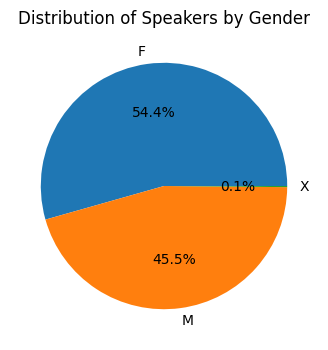

In [ ]:
import altair as alt
import pandas as pd

# Merge the speakers and words dataframes
merged_df = pd.merge(df_speakers_words, speakers, left_on='speaker', right_index=True)

# Filter the dataset based on a specific age range
filtered_df = merged_df[(merged_df['exactage'] >= 20) & (merged_df['exactage'] <= 30)]

# Calculate the average number of overlapping words in dialogues with speakers in the filtered age range
avg_overlap = filtered_df.groupby('exactage')['n_words'].mean().reset_index()

# Create an area chart for average overlapping words by age
area_avg_overlap = alt.Chart(avg_overlap).mark_area(opacity=0.5).encode(
    x='exactage:O',
    y='n_words:Q',
    tooltip=['exactage', 'n_words']
).properties(
    title='Average Overlapping Words by Age (Area Chart)'
)

# Display the area chart
area_avg_overlap.display()

import matplotlib.pyplot as plt

gender_counts = speakers['gender'].value_counts()

plt.figure(figsize=(4, 4))  # Adjust the figure size here

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Speakers by Gender')
plt.show()



<ipython-input-176-b4dffb50a9d9>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


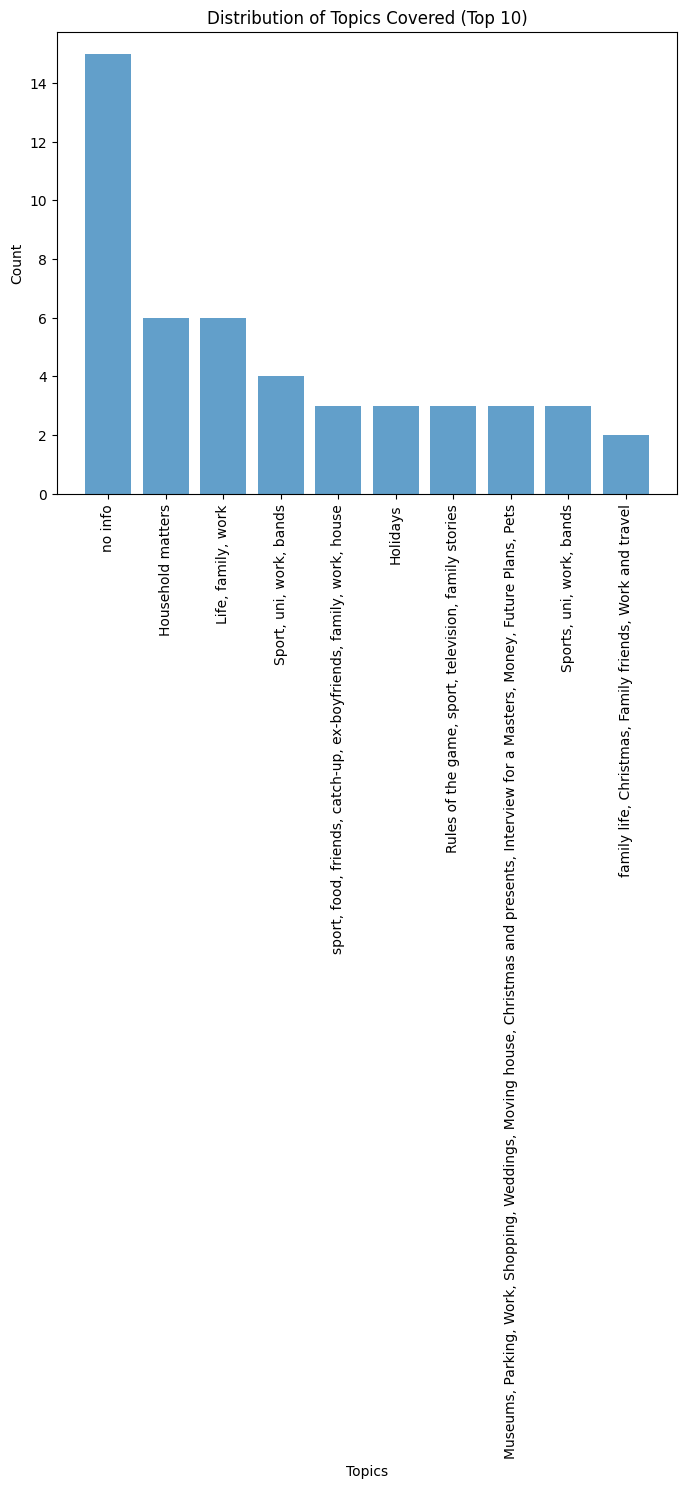

In [ ]:
#polting bar graph on Distribution of Topics Covered
topics_counts = texts['topics'].value_counts()
top_topics = topics_counts.head(10)  # Select the top 10 topics

fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size here

x_pos = range(len(top_topics))
topic_counts = top_topics.values

ax.bar(x_pos, topic_counts, alpha=0.7)

ax.set_xlabel('Topics')
ax.set_ylabel('Count')
ax.set_title('Distribution of Topics Covered (Top 10)')

plt.xticks(x_pos, top_topics.index, rotation=90)
plt.tight_layout()

plt.show()


In [ ]:
# Define age range bins
age_bins = [(0, 18), (19, 30), (31, 50), (51, 200)]  # Update with desired age ranges

# Initialize variables
speakers_words = defaultdict(int)
speakers_dialogues = defaultdict(list)

# Iterate through XML files
for f_path in f_paths:
    xml = get_xml(f_path)
    dialogue_id = os.path.basename(f_path)[:-4]  # Extract dialogue ID from file path
    
    # Iterate through 'u' elements (utterances)
    for u in xml.iter('u'):
        speaker = u.get('who')
        n_words = len([w for w in u.iter('w')])
        
        # Accumulate word count per speaker
        speakers_words[speaker] += n_words
        
        # Store dialogue ID for each speaker
        speakers_dialogues[speaker].append(dialogue_id)

# Calculate the number of speakers and dialogues per age group
age_group_counts = defaultdict(int)
age_group_dialogues = defaultdict(list)
for speaker, dialogues in speakers_dialogues.items():
    age = speakers.loc[speaker, 'exactage']
    for age_range in age_bins:
        if age_range[0] <= age <= age_range[1]:
            age_group = f"{age_range[0]}-{age_range[1]}"
            age_group_counts[age_group] += 1
            age_group_dialogues[age_group].extend(dialogues)
            break

# Calculate the number of speakers and dialogues per dialogue
dialogue_speaker_counts = defaultdict(int)
for dialogues in speakers_dialogues.values():
    for dialogue in dialogues:
        dialogue_speaker_counts[dialogue] += 1

# Perform clustering on dialogue content for each age group
dialogue_contents = defaultdict(list)
for f_path in f_paths:
    xml = get_xml(f_path)
    dialogue_id = os.path.basename(f_path)[:-4]
    content = ' '.join([w.text for w in xml.iter('w')])
    
    # Store dialogue content per age group
    for age_range in age_bins:
        if dialogue_id in age_group_dialogues[f"{age_range[0]}-{age_range[1]}"]:
            dialogue_contents[f"{age_range[0]}-{age_range[1]}"].append(content)
            break



In [ ]:
# Perform clustering and identify main themes for each age group
n_clusters = 3  # Update with desired number of clusters
cluster_labels = {}
for age_group, contents in dialogue_contents.items():
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(contents)
    
    # Apply clustering algorithm
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    
    # Assign cluster labels to dialogues
    cluster_labels[age_group] = kmeans.labels_

# Display the summary information
print("Summary Statistics for Age Groups:")
for age_group, count in age_group_counts.items():
    print(f"Age Group: {age_group} | Number of Speakers: {count}")

print("\nSummary Statistics for Dialogues:")
for dialogue, count in dialogue_speaker_counts.items():
    print(f"Dialogue ID: {dialogue} | Number of Speakers: {count}")

print("\nMain Themes by Age Group:")
for age_group, labels in cluster_labels.items():
    print(f"\nAge Group: {age_group}")
    for cluster in range(n_clusters):
        cluster_dialogues = np.array(list(dialogue_contents[age_group]))[labels == cluster]
        print(f"Cluster {cluster+1} Dialogues:")
        for dialogue in cluster_dialogues:
            print(dialogue)
        print("---")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Summary Statistics for Age Groups:
Age Group: 31-50 | Number of Speakers: 122
Age Group: 51-200 | Number of Speakers: 166
Age Group: 0-18 | Number of Speakers: 46
Age Group: 19-30 | Number of Speakers: 194

Summary Statistics for Dialogues:
Dialogue ID: S7SU-tgd | Number of Speakers: 2577
Dialogue ID: S7NH-tgd | Number of Speakers: 1358
Dialogue ID: S7Z8-tgd | Number of Speakers: 374
Dialogue ID: S9N4-tgd | Number of Speakers: 1549
Dialogue ID: SDR9-tgd | Number of Speakers: 1542
Dialogue ID: SDAJ-tgd | Number of Speakers: 635
Dialogue ID: SE88-tgd | Number of Speakers: 1085
Dialogue ID: SEGU-tgd | Number of Speakers: 1624
Dialogue ID: SJLT-tgd | Number of Speakers: 1901
Dialogue ID: SJG5-tgd | Number of Speakers: 1077
Dialogue ID: SJW4-tgd | Number of Speakers: 889
Dialogue ID: SK3B-tgd | Number of Speakers: 1795
Dialogue ID: SMME-tgd | Number of Speakers: 1949
Dialogue ID: SNLY-tgd | Number of Speakers: 842
Dialogue ID: SQP2-tgd | Number of Speakers: 1614
Dialogue ID: SQWC-tgd | Numb

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Cluster 3 Dialogues:
so what have we got planned for supper ? well there 's filled pasta spinach and ricotta mm mm with some variety of sauce what what do you think you 've got ? erm tomato and basil mm mm that 's a good standby sweet tomato erm tomato and sweet pepper --UNCLEARWORD that 's probably my overall favourite I do n't think I 've got a vegetable one oh I do n't think I have that one is that the one we have in the summer ? possibly which you no that was a that was a curry one I think oh we had the curry one yeah we I do n't know if they make that anymore with the lentil mm that was very tasty I enjoyed that one and erm mm so if we have that today what have we got for tomorrow ? we have some erm ch- cheese and what are they ? cheese and leek plaits oh yeah Linda McCartney well McCartney ones cheese and leek plaits yes Linda McCartney ones the cheese and leek plaits with erm a random selection of sauces and vegetables oh --ANONnameF 's steamed vegetables my steamed vegetables w

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Use the zero_division parameter to control the behavior of undefined metrics
classification_report(y_test, y_pred, zero_division=1)

# Merge the speakers and words data
merged_df = pd.merge(df_speakers_words, speakers, left_on='speaker', right_index=True)

# Select the relevant columns for the feature matrix and target variable
X = merged_df[['n_words']]
y = merged_df['exactage']

# Drop rows with missing values in both the feature matrix and target variable
merged_df.dropna(subset=['n_words', 'exactage'], inplace=True)

# Assign the updated feature matrix and target variable
X = merged_df[['n_words']]  # Update with additional features if applicable
y = merged_df['exactage']

# Data Preprocessing
# Scale the features if necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize a list to store the accuracies and reports
accuracies = []
reports = []

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)
accuracies.append(dt_accuracy)
reports.append(dt_report)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
accuracies.append(lr_accuracy)
reports.append(lr_report)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred)
accuracies.append(nb_accuracy)
reports.append(nb_report)

# Create a table to compare the accuracies
accuracy_table = pd.DataFrame({
    'Classifier': ['Decision Tree', 'Logistic Regression', 'Naive Bayes'],
    'Accuracy': accuracies
})

print("Accuracy Comparison:")
print(accuracy_table)

# Print the classification reports
for i, classifier in enumerate(['Decision Tree', 'Logistic Regression', 'Naive Bayes']):
    print(f"\nClassification Report for {classifier}:")
    print(reports[i])

# Error Analysis
for i, classifier in enumerate(['Decision Tree', 'Logistic Regression', 'Naive Bayes']):
    print(f"\nConfusion Matrix for {classifier}:")
    cm = confusion_matrix(y_test, [dt_pred, lr_pred, nb_pred][i])
    print(cm)


Accuracy Comparison:
            Classifier  Accuracy
0        Decision Tree  0.111111
1  Logistic Regression  0.222222
2          Naive Bayes  0.133333

Classification Report for Decision Tree:
              precision    recall  f1-score   support

        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         2
        17.0       0.00      0.00      0.00         1
        18.0       0.00      0.00      0.00         2
        19.0       0.50      0.25      0.33         4
        20.0       0.10      0.25      0.14         4
        21.0       0.00      0.00      0.00         6
        22.0       0.00      0.00      0.00         3
        23.0       0.00      0.00      0.00         6
        24.0       0.00      0.00      0.00         2
        25.0       0.00      0.00      0.00         2
        26.0       0.00      0.00      0.00         2
        27.0       0.00      0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Merge the speakers and words data
merged_df = pd.merge(df_speakers_words, speakers, left_on='speaker', right_index=True)

# Select the relevant columns for the feature matrix and target variable
X = merged_df[['n_words']]
y = merged_df['exactage']

# Drop rows with missing values in both the feature matrix and target variable
merged_df.dropna(subset=['n_words', 'exactage'], inplace=True)

# Data Preprocessing
# Scale the features if necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Address Class Imbalance
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize a list to store the accuracies
accuracies = []

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
accuracies.append(rf_accuracy)
rf_report = classification_report(y_test, rf_pred)

# Multi-Layer Perceptron (MLP)
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train_resampled, y_train_resampled)
mlp_pred = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
accuracies.append(mlp_accuracy)
mlp_report = classification_report(y_test, mlp_pred)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
accuracies.append(knn_accuracy)
knn_report = classification_report(y_test, knn_pred)

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
accuracies.append(svm_accuracy)
svm_report = classification_report(y_test, svm_pred)

# Create a table to compare the accuracies
accuracy_table = pd.DataFrame({
    'Classifier': ['Random Forest', 'MLP', 'KNN', 'SVM'],
    'Accuracy': accuracies
})

# Print accuracy comparison table
print("Accuracy Comparison:")
print(accuracy_table)
# Generate classification report for Random Forest
rf_report = classification_report(y_test, rf_pred)
print("Random Forest Classification Report:")
print(rf_report)

# Generate classification report for MLP
mlp_report = classification_report(y_test, mlp_pred)
print("MLP Classification Report:")
print(mlp_report)

# Generate classification report for KNN
knn_report = classification_report(y_test, knn_pred)
print("KNN Classification Report:")
print(knn_report)

# Generate classification report for SVM
svm_report = classification_report(y_test, svm_pred)
print("SVM Classification Report:")
print(svm_report)
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)
print("Random Forest Confusion Matrix:")
print(rf_cm)

# Generate confusion matrix for MLP
mlp_cm = confusion_matrix(y_test, mlp_pred)
print("MLP Confusion Matrix:")
print(mlp_cm)

# Generate confusion matrix for KNN
knn_cm = confusion_matrix(y_test, knn_pred)
print("KNN Confusion Matrix:")
print(knn_cm)

# Generate confusion matrix for SVM
svm_cm = confusion_matrix(y_test, svm_pred)
print("SVM Confusion Matrix:")
print(svm_cm)




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Accuracy Comparison:
      Classifier  Accuracy
0  Random Forest  0.111111
1            MLP  0.014815
2            KNN  0.029630
3            SVM  0.007407
Random Forest Classification Report:
              precision    recall  f1-score   support

        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         2
        17.0       0.00      0.00      0.00         1
        18.0       0.00      0.00      0.00         2
        19.0       0.50      0.25      0.33         4
        20.0       0.10      0.25      0.14         4
        21.0       0.00      0.00      0.00         6
        22.0       0.00      0.00      0.00         3
        23.0       0.00      0.00      0.00         6
        24.0       0.00      0.00      0.00         2
        25.0       0.00      0.00      0.00         2
        26.0       0.00      0.00      0.00         2
        27.0       0.00      0.00      0.00       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.